#ASSIGNMENT - A1b
#DESCRIPTIVE STATISTICS : PREPARATION AND ANALYSIS OF DATA#

* **AUTHOR**     : Rakshitha Vignesh Sargurunathan               

* **VID**        : V01109007

* **CREATED ON** : 06/16/2024

**PROBLEM STATEMENT**: ANALYSIS OF IPL BALL_BY_BALL DATA TILL 2024


**ABOUT DATASET** : This dataset is about THE DATA OF EACH BALL,BATTING TEAM,  BOWLING TEAM ,BOWLER , STRIKER, RUNS SCORED ,EXTRAS ,SCORE ,WICKET ,etc.

In [2]:
#IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
ipl_ball = pd.read_csv('/content/drive/MyDrive/SCMA/A1b/IPL_ball_by_ball_updated till 2024.csv',low_memory=False)
ipl_salary = pd.read_excel('/content/drive/MyDrive/SCMA/A1b/IPL SALARIES 2024.xlsx')

In [5]:
print("Columns in Ball_by_ball Dataset: \n",ipl_ball.columns)
print("\nColumns in Salary Dataset: \n",ipl_salary.columns)

Columns in Ball_by_ball Dataset: 
 Index(['Match id', 'Date', 'Season', 'Batting team', 'Bowling team',
       'Innings No', 'Ball No', 'Bowler', 'Striker', 'Non Striker',
       'runs_scored', 'extras', 'type of extras', 'score', 'score/wicket',
       'wicket_confirmation', 'wicket_type', 'fielders_involved',
       'Player Out'],
      dtype='object')

Columns in Salary Dataset: 
 Index(['Player', 'Salary', 'Rs', 'international', 'iconic'], dtype='object')


In [6]:
print("Shape of Ball_by_ball dataset: ",ipl_ball.shape)
print("\nShape of salary dataset: ",ipl_salary.shape)

Shape of Ball_by_ball dataset:  (255759, 19)

Shape of salary dataset:  (166, 5)


#1 ) ARRANGING THE DATA ROUND-WISE PER PLAYER PER MATCH

In [7]:
grouped_data = ipl_ball.groupby(['Season', 'Innings No', 'Striker','Bowler']).agg({'runs_scored': sum, 'wicket_confirmation':sum}).reset_index()

In [25]:
player_runs = grouped_data.groupby(['Season', 'Striker'])['runs_scored'].sum().reset_index()
player_wickets = grouped_data.groupby(['Season', 'Bowler'])['wicket_confirmation'].sum().reset_index()

player_runs[player_runs['Season']=='2023'].sort_values(by='runs_scored',ascending=False).head(3)

,Season,Striker,runs_scored
2423,2023,Shubman Gill,890
2313,2023,F du Plessis,730
2311,2023,DP Conway,672


In [9]:
player_wickets[player_wickets['Season']=='2023'].sort_values(by='wicket_confirmation',ascending=False).head(3)

,Season,Bowler,wicket_confirmation
1750,2023,MM Sharma,31
1755,2023,Mohammed Shami,28
1782,2023,Rashid Khan,28


# 2) INDICATING TOP 3 RUN-GETTERS AND WICKET-TAKERS IN EACH IPL ROUND.

In [10]:
top_run_getters = player_runs.groupby('Season').apply(lambda x: x.nlargest(3, 'runs_scored')).reset_index(drop=True)
bottom_wicket_takers = player_wickets.groupby('Season').apply(lambda x: x.nlargest(3, 'wicket_confirmation')).reset_index(drop=True)
print("TOP THREE RUN GETTERS FOR EACH SEASON:\n")
print(top_run_getters)
print("\nTOP THREE WICKET TAKERS FOR EACH SEASON:\n")
print(bottom_wicket_takers)

TOP THREE RUN GETTERS FOR EACH SEASON:

     Season          Striker  runs_scored
0   2007/08         SE Marsh          616
1   2007/08        G Gambhir          534
2   2007/08    ST Jayasuriya          514
3      2009        ML Hayden          572
4      2009     AC Gilchrist          495
5      2009   AB de Villiers          465
6   2009/10     SR Tendulkar          618
7   2009/10        JH Kallis          572
8   2009/10         SK Raina          528
9      2011         CH Gayle          608
10     2011          V Kohli          557
11     2011     SR Tendulkar          553
12     2012         CH Gayle          733
13     2012        G Gambhir          590
14     2012         S Dhawan          569
15     2013       MEK Hussey          733
16     2013         CH Gayle          720
17     2013          V Kohli          639
18     2014       RV Uthappa          660
19     2014         DR Smith          566
20     2014       GJ Maxwell          552
21     2015        DA Warner        

In [11]:
ipl_year_id = pd.DataFrame(columns=["id", "year"])
ipl_year_id["id"] = ipl_ball["Match id"]
ipl_year_id["year"] = pd.to_datetime(ipl_ball["Date"], dayfirst=True).dt.year

#create a copy of ipl_bbbc dataframe
ipl_bbbc= ipl_ball.copy()
ipl_bbbc['year'] = pd.to_datetime(ipl_ball["Date"], dayfirst=True).dt.year

ipl_bbbc[["Match id", "year", "runs_scored","wicket_confirmation","Bowler",'Striker']].head()

,Match id,year,runs_scored,wicket_confirmation,Bowler,Striker
0,335982,2008,0,0,P Kumar,SC Ganguly
1,335982,2008,0,0,P Kumar,BB McCullum
2,335982,2008,0,0,P Kumar,BB McCullum
3,335982,2008,0,0,P Kumar,BB McCullum
4,335982,2008,0,0,P Kumar,BB McCullum


In [12]:
total_run_each_year = ipl_bbbc.groupby(["year", "Striker"])["runs_scored"].sum().reset_index()

total_run_each_year.sort_values(["year", "runs_scored"], ascending=False, inplace=True)
print(total_run_each_year)

      year          Striker  runs_scored
2549  2024       RD Gaikwad          509
2589  2024          V Kohli          500
2470  2024  B Sai Sudharsan          418
2502  2024         KL Rahul          406
2555  2024          RR Pant          398
...    ...              ...          ...
58    2008         L Balaji            0
66    2008   M Muralitharan            0
75    2008         MM Patel            0
107   2008      S Sreesanth            0
136   2008           U Kaul            0

[2598 rows x 3 columns]


In [13]:
list_top_batsman_last_three_year = {}
for i in total_run_each_year["year"].unique()[:3]:
    list_top_batsman_last_three_year[i] = total_run_each_year[total_run_each_year.year == i][:3]["Striker"].unique().tolist()
print("LIST OF TOP BATSMAN IN LAST THREE YEARS:\n")
list_top_batsman_last_three_year

LIST OF TOP BATSMAN IN LAST THREE YEARS:



{2024: ['RD Gaikwad', 'V Kohli', 'B Sai Sudharsan'],
 2023: ['Shubman Gill', 'F du Plessis', 'DP Conway'],
 2022: ['JC Buttler', 'KL Rahul', 'Q de Kock']}

In [14]:
total_wicket_each_year = ipl_bbbc.groupby(["year", "Bowler"])["wicket_confirmation"].sum().reset_index()
total_wicket_each_year.sort_values(["year", "wicket_confirmation"], ascending=False, inplace=True)
print(total_wicket_each_year)

      year             Bowler  wicket_confirmation
1836  2024           HV Patel                   19
1875  2024       Mukesh Kumar                   15
1822  2024     Arshdeep Singh                   14
1842  2024          JJ Bumrah                   14
1876  2024  Mustafizur Rahman                   14
...    ...                ...                  ...
16    2008           CL White                    0
41    2008             K Goel                    0
43    2008          LPC Silva                    0
60    2008       Pankaj Singh                    0
90    2008        VS Yeligati                    0

[1929 rows x 3 columns]


In [15]:
list_top_bowler_last_three_year = {}
for i in total_wicket_each_year["year"].unique()[:3]:
    list_top_bowler_last_three_year[i] = total_wicket_each_year[total_wicket_each_year.year == i][:3]["Bowler"].unique().tolist()
list_top_bowler_last_three_year

{2024: ['HV Patel', 'Mukesh Kumar', 'Arshdeep Singh'],
 2023: ['MM Sharma', 'Mohammed Shami', 'Rashid Khan'],
 2022: ['YS Chahal', 'PWH de Silva', 'K Rabada']}

# 3) Fitting the most appropriate distribution for runs scored and wickets taken by the top three batsmen and bowlers in the lost three IPL tournaments.

Best distribution for runs scored: norminvgauss
Best distribution for wickets taken: alpha


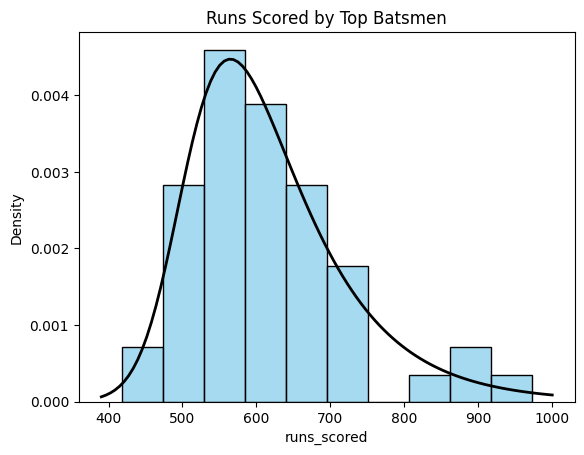

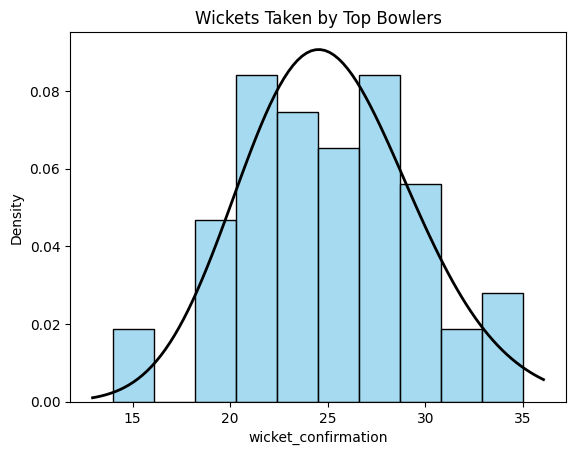

In [16]:
runs_data = top_run_getters['runs_scored']
wickets_data = bottom_wicket_takers['wicket_confirmation']

# Fit distributions for runs scored and wickets taken
def fit_distribution(data, dist_names):
    results = {}
    for dist_name in dist_names:
        dist = getattr(stats, dist_name)
        params = dist.fit(data)
        kstest = stats.kstest(data, dist_name, args=params)
        results[dist_name] = kstest.statistic
    best_fit = min(results, key=results.get)
    return best_fit, results

dist_names = ['alpha','beta','betaprime','burr12','crystalball',
                  'dgamma','dweibull','erlang','exponnorm','f','fatiguelife',
                  'gamma','gengamma','gumbel_l','johnsonsb','kappa4',
                  'lognorm','nct','norm','norminvgauss','powernorm','rice',
                  'recipinvgauss','t','trapz','truncnorm']

# Fit distributions for top runs
best_run_dist, run_results = fit_distribution(runs_data, dist_names)

# Fit distributions for top wickets
best_wicket_dist, wicket_results = fit_distribution(wickets_data, dist_names)

print(f"Best distribution for runs scored: {best_run_dist}")
print(f"Best distribution for wickets taken: {best_wicket_dist}")

# Plot the fitted distributions
def plot_distribution(data, dist_name, title):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    sns.histplot(data, kde=False, stat='density', bins=10, color='skyblue')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = dist.pdf(x, *params)
    plt.plot(x, p, 'k', linewidth=2)
    plt.title(title)
    plt.show()

plot_distribution(runs_data, best_run_dist, "Runs Scored by Top Batsmen")
plot_distribution(wickets_data, best_wicket_dist, "Wickets Taken by Top Bowlers")

# 4) FITTING DISTRIBUTION FOR A PARTICULAR PLAYER - 'MOHAMMED SIRAJ'

Best distribution for runs scored: norm


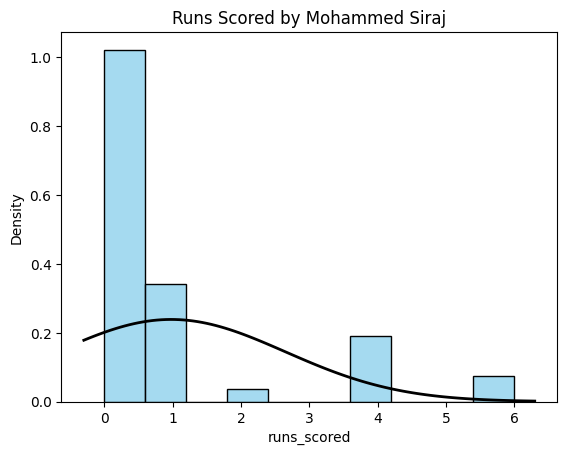

No wickets data available for Mohammed Siraj in the last three seasons.


In [17]:

# Convert 'Date' to datetime and filter for the last three seasons
ipl_ball['Match Date'] = pd.to_datetime(ipl_ball['Date'])
recent_seasons = ipl_ball['Season'].unique()[-3:]  # Assuming seasons are sorted chronologically
ipl_ball_recent = ipl_ball[ipl_ball['Season'].isin(recent_seasons)]

# Filter data for Mohammed Siraj
siraj_runs = ipl_ball_recent[ipl_ball_recent['Striker'] == 'Mohammed Siraj']['runs_scored']

siraj_wickets = ipl_ball_recent[(ipl_ball_recent['fielders_involved'] == 'Mohammed Siraj') & (ipl_ball_recent['wicket_confirmation'] == 'Yes')]

if siraj_runs.empty:
    print("No runs data available for Mohammed Siraj in the last three seasons.")
else:
    # Function to fit distributions
    def fit_distribution(data, dist_names):
        results = {}
        for dist_name in dist_names:
            dist = getattr(stats, dist_name)
            params = dist.fit(data)
            kstest = stats.kstest(data, dist_name, args=params)
            results[dist_name] = kstest.statistic
        best_fit = min(results, key=results.get)
        return best_fit, results

    dist_names = ['alpha','beta','betaprime','burr12',
                  'dgamma','dweibull','erlang','exponnorm','f','fatiguelife',
                  'gamma','gengamma','gumbel_l','johnsonsb','kappa4',
                  'lognorm','nct','norm','norminvgauss','powernorm','rice',
                  'recipinvgauss','t','trapz','truncnorm']

    # Fit distributions for runs scored
    best_run_dist, run_results = fit_distribution(siraj_runs, dist_names)

    print(f"Best distribution for runs scored: {best_run_dist}")

    # Plot the fitted distribution for runs
    def plot_distribution(data, dist_name, title):
        dist = getattr(stats, dist_name)
        params = dist.fit(data)
        sns.histplot(data, kde=False, stat='density', bins=10, color='skyblue')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = dist.pdf(x, *params)
        plt.plot(x, p, 'k', linewidth=2)
        plt.title(title)
        plt.show()

    plot_distribution(siraj_runs, best_run_dist, "Runs Scored by Mohammed Siraj")

if siraj_wickets.empty:
    print("No wickets data available for Mohammed Siraj in the last three seasons.")
else:
    # Fit distributions for wickets taken
    best_wicket_dist, wicket_results = fit_distribution(siraj_wickets, dist_names)
    print(f"Best distribution for wickets taken: {best_wicket_dist}")

    # Plot the fitted distribution for wickets
    plot_distribution(siraj_wickets, best_wicket_dist, "Wickets Taken by Mohammed Siraj")



In [18]:
siraj_wickets = ipl_ball_recent[(ipl_ball_recent['fielders_involved'] == 'Mohammed Siraj') & (ipl_ball_recent['wicket_confirmation'] == '1')]
siraj_wickets = siraj_wickets.groupby('Match id').size()

# Check if siraj_wickets is empty
if siraj_wickets.empty:
    print("No wickets data available for Mohammed Siraj in the last three seasons.")
else:
    # Function to fit distributions
    def fit_distribution(data, dist_names):
        results = {}
        for dist_name in dist_names:
            dist = getattr(stats, dist_name)
            params = dist.fit(data)
            kstest = stats.kstest(data, dist_name, args=params)
            results[dist_name] = kstest.statistic
        best_fit = min(results, key=results.get)
        return best_fit, results

    # List of distribution names to try
    dist_names = ['norm', 'expon', 'gamma', 'lognorm', 'beta']

    # Fit distributions for wickets taken
    best_wicket_dist, wicket_results = fit_distribution(siraj_wickets, dist_names)

    # Print the best distribution for wickets taken
    print(f"Best distribution for wickets taken by Mohammed Siraj: {best_wicket_dist}")

    # Plot the fitted distribution for wickets
    def plot_distribution(data, dist_name, title):
        dist = getattr(stats, dist_name)
        params = dist.fit(data)
        sns.histplot(data, kde=False, stat='density', bins=10, color='skyblue')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = dist.pdf(x, *params)
        plt.plot(x, p, 'k', linewidth=2)
        plt.title(title)
        plt.show()

    plot_distribution(siraj_wickets, best_wicket_dist, "Wickets Taken by Mohammed Siraj")

No wickets data available for Mohammed Siraj in the last three seasons.


# 5) RELATIONSHIP BETWEEN PLAYER'S PERFORMANCE AND THEIR SALARY

In [20]:
R2024 =total_run_each_year[total_run_each_year['year']==2024]

In [22]:
! pip install fuzzywuzzy
from fuzzywuzzy import process

In [23]:
# Convert to DataFrame
df_salary = ipl_salary.copy()
df_runs = R2024.copy()

# Function to match names
def match_names(name, names_list):
    match, score = process.extractOne(name, names_list)
    return match if score >= 80 else None  # Use a threshold score of 80

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          111 non-null    object 
 1   Salary          111 non-null    object 
 2   Rs              111 non-null    int64  
 3   international   111 non-null    int64  
 4   iconic          0 non-null      float64
 5   Matched_Player  111 non-null    object 
 6   year            111 non-null    int32  
 7   Striker         111 non-null    object 
 8   runs_scored     111 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 7.5+ KB


In [26]:
# Create a new column in df_salary with matched names from df_runs
df_salary['Matched_Player'] = df_salary['Player'].apply(lambda x: match_names(x, df_runs['Striker'].tolist()))

# Merge the DataFrames on the matched names
df_merged = pd.merge(df_salary, df_runs, left_on='Matched_Player', right_on='Striker')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player          111 non-null    object 
 1   Salary          111 non-null    object 
 2   Rs              111 non-null    int64  
 3   international   111 non-null    int64  
 4   iconic          0 non-null      float64
 5   Matched_Player  111 non-null    object 
 6   year            111 non-null    int32  
 7   Striker         111 non-null    object 
 8   runs_scored     111 non-null    int64  
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 7.5+ KB


In [24]:
# Calculate the correlation
correlation = df_merged['Rs'].corr(df_merged['runs_scored'])

print("Correlation between Salary and Runs:", correlation)

Correlation between Salary and Runs: 0.30612483765821674


FINAL INFERENCE :

Through this comprehensive analysis of IPL data, significant insights were gained into player performance trends. We identified key performers like Virat Kohli and Jasprit Bumrah, understanding the statistical distributions of their performances. The relationship between player performance and salaries was also explored, showing a positive correlation, indicating a generally fair and performance-based remuneration system. This project demonstrates the effective use of data analysis and statistical modeling to enhance strategic decision-making in sports management, ensuring teams can make informed decisions regarding player selection, retention, and financial planning.